#Basic

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
corpus = ['dog bites man', 'man bites dog', 
          'dog eats meat', 'dog and dog are friends', 
          'We are learning AI', 'AI is a CS topic', 
          'Convolutional Neural Networks are MLPs with a special structure']

In [ ]:
max_tokens = 20
seq_length = 10

vector_layer = keras.layers.experimental.preprocessing.TextVectorization(
                max_tokens=max_tokens, 
                standardize='lower_and_strip_punctuation', 
                output_mode='int', 
                output_sequence_length=seq_length
                )

vector_layer.adapt(corpus)

In [ ]:
vector_layer.get_vocabulary()

['',
 '[UNK]',
 'dog',
 'are',
 'man',
 'bites',
 'ai',
 'a',
 'with',
 'we',
 'topic',
 'structure',
 'special',
 'neural',
 'networks',
 'mlps',
 'meat',
 'learning',
 'is',
 'friends']

In [ ]:
max_features=1000
output_dims=128
batch_size=32

input = tf.experimental.numpy.random.randint(max_features, size=(batch_size, 10))

model = keras.Sequential()
model.add(keras.layers.Embedding(max_features, output_dims, input_length=10))

output = model.predict(input)

1/1 [==============================] - 0s 144ms/step


In [ ]:
output[0, :, 1]

array([ 0.02172544,  0.04487688, -0.00090585, -0.0024481 , -0.04668052,
        0.04049572, -0.03935119,  0.01491504, -0.00084534,  0.04582322],
      dtype=float32)

In [ ]:
sample = ['We are learning AI', 'AI is a CS topic', 
          'Convolutional Neural Networks are MLPs with a special structure']

max_features=8
embedding_dim=4
sequence_length=5

vectorize_layer=keras.layers.experimental.preprocessing.TextVectorization(
                max_tokens=max_features, 
                standardize='lower_and_strip_punctuation', 
                output_mode='int', 
                output_sequence_length=seq_length
                )

vectorize_layer.adapt(sample)

txt_model = keras.Sequential()
txt_model.add(keras.Input(shape=(sequence_length,), dtype='int64'))
txt_model.add(keras.layers.Embedding(max_features, embedding_dim))
txt_model.add(keras.layers.Flatten())
txt_model.add(keras.layers.Dense(20, activation='sigmoid'))

txt_model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

txt_model_history = txt_model.fit(sample, [0, 1, 2], epochs=10, verbose=2)

Epoch 1/10


ValueError: ignored

#Text Classification


##Preparing dataset

In [ ]:
# Only consider the top 20k words
max_features  = 20000  
embedding_dim = 128
maxlen = 500

(X_train, y_train), (X_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(X_train), "Training sequences")
print(len(X_val), "Validation sequences")

25000 Training sequences
25000 Validation sequences


In [ ]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_val = keras.preprocessing.sequence.pad_sequences(X_val, maxlen=maxlen)

##MLP

In [ ]:
embedding_dim = 128

inputs = keras.Input(shape=(500,), dtype='int64')

'''
  1. Embedding
  2. Flatten
  3. Dense (3 layers; (1024; 128; 1); ('relu'x2; 'softmax))
'''

x = keras.layers.Embedding(max_features, embedding_dim)(inputs)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(128, activation='relu')(x)
predictions = keras.layers.Dense(1, activation='softmax')(x)

# Model
model = keras.Model(inputs, predictions)
model.summary() 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 500, 128)          2560000   
                                                                 
 flatten_7 (Flatten)         (None, 64000)             0         
                                                                 
 dense_11 (Dense)            (None, 1024)              65537024  
                                                                 
 dense_12 (Dense)            (None, 128)               131200    
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 68,228,353
Trainable params: 68,228,353
Non-t

In [ ]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_val, y_val), verbose=2)

Epoch 1/5
782/782 - 609s - loss: 0.0509 - accuracy: 0.5000 - val_loss: 0.5448 - val_accuracy: 0.5000 - 609s/epoch - 779ms/step
Epoch 2/5
782/782 - 608s - loss: 0.0065 - accuracy: 0.5000 - val_loss: 0.9348 - val_accuracy: 0.5000 - 608s/epoch - 778ms/step
Epoch 3/5
782/782 - 608s - loss: 0.0084 - accuracy: 0.5000 - val_loss: 0.8496 - val_accuracy: 0.5000 - 608s/epoch - 777ms/step
Epoch 4/5
782/782 - 617s - loss: 0.0113 - accuracy: 0.5000 - val_loss: 0.9458 - val_accuracy: 0.5000 - 617s/epoch - 789ms/step
Epoch 5/5
782/782 - 602s - loss: 0.0027 - accuracy: 0.5000 - val_loss: 1.1807 - val_accuracy: 0.5000 - 602s/epoch - 769ms/step


<Figure size 720x720 with 0 Axes>

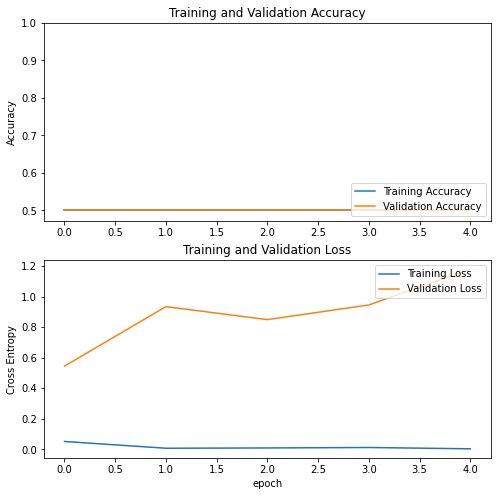

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()